In [119]:
from sympy import *
import numpy as np 
import matplotlib.pyplot as plt 
import math

init_printing(use_unicode=True)

In [120]:
x, t, m, k, C1, C2 = symbols('x t m k C1 C2')
x = Function('x')(t)

In [121]:
def simple_harmonic_motion():
    expr = m * x.diff(t, t)
    smh = Eq(expr, -k * x)
    solution = dsolve(smh, x)
    return solution

In [122]:
def input_values_and_inital_conditions(solution, mass, k_value, x0, v0, t0):
    solution_with_values = solution.rhs.subs({m:mass, k:k_value, C1: x0, C2: (v0 +k*x0)/m})
    numeric_solution = lambdify(t, solution_with_values, 'numpy')
    return numeric_solution

In [123]:
def plot(numeric_solution, time_values, position_values, period, frequency):
    plt.plot(time_values, position_values, 'r')
    plt.text(0.7, 0.9, f'Period: {period:.2f}', transform=plt.gca().transAxes)
    plt.text(0.7, 0.85, f'Frequency: {frequency:.2f}', transform=plt.gca().transAxes)
    plt.title('Simple Harmonic Motion')
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.grid(True)
    plt.show()

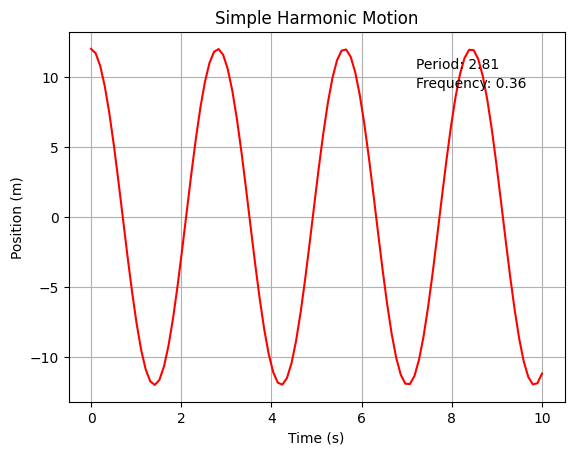

In [124]:
mass = float(input('Please enter the mass: '))
k_value = float(input('Please enter the spring constant: '))
x0 = float(input('Enter the initial position: '))
v0 = float(input('Enter the initial velocity: '))
t0 = float(input('Enter the start time: '))

smh = simple_harmonic_motion()
numeric_solution = input_values_and_inital_conditions(smh, mass, k_value, x0, v0, t0)


time_values = np.linspace(0, 10, 100)
position_values = np.real(numeric_solution(time_values))

angular_frequency = sqrt(k_value/mass)
frequency = angular_frequency / (2*math.pi)
period = 1/frequency
    
plot(numeric_solution, time_values, position_values, period, frequency)
